In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import polars as pl
from vns import Session, Trial

session = Session(path=Path("data/BFINAC_VNS/BFnovelinac_31_01_2019_16_11"))

In [9]:
session.get_trials().select(pl.col("trialstarttime"))

trialstarttime
time
00:00:00.006917694
00:00:00.006917702
00:00:00.006917712
00:00:00.006917720
00:00:00.006917728
…
00:00:00.006921352
00:00:00.006921360
00:00:00.006921369


In [3]:
trial = Trial(path=Path("data/BFINAC_VNS/BFnovelinac_31_01_2019_16_11/1"))

x,y,d,?,t
f64,f64,f64,f64,f64
-0.198669,0.210571,-2.120972,1.79718,6536.647901
-0.198669,0.207214,-2.125549,1.798706,6536.648901
-0.198669,0.208435,-2.127075,1.800842,6536.649901
-0.198669,0.204773,-2.12738,1.791382,6536.650901
-0.2005,0.204773,-2.125549,1.794128,6536.651901
…,…,…,…,…
4.983215,4.981689,-2.119751,1.80481,6544.610901
4.9823,4.981689,-2.122192,1.797791,6544.611901
4.982605,4.981079,-2.122498,1.799927,6544.612901


In [15]:
trial.eyejoy().with_columns(
    ((pl.col("t") - pl.col("t").min()) * 1000)
    .alias("t0")
    .cast(dtype=pl.Duration("ms")),
).drop("t")

x,y,d,?,t0
f64,f64,f64,f64,duration[ms]
-0.198669,0.210571,-2.120972,1.79718,0ms
-0.198669,0.207214,-2.125549,1.798706,0ms
-0.198669,0.208435,-2.127075,1.800842,0ms
-0.198669,0.204773,-2.12738,1.791382,0ms
-0.2005,0.204773,-2.125549,1.794128,0ms
…,…,…,…,…
4.983215,4.981689,-2.119751,1.80481,7ms
4.9823,4.981689,-2.122192,1.797791,7ms
4.982605,4.981079,-2.122498,1.799927,7ms


In [6]:
s1t1.filter(pl.col("x") != 0.0)

x,y
f64,f64
-3.866882,0.664673
-3.866272,0.66803
-3.863831,0.674133
-3.86261,0.679932
-3.858948,0.682068
…,…
0.684509,-0.047302
0.684814,-0.040588
0.683899,-0.033264


In [1]:
df = pl.DataFrame(
    {"A": [1.0, 2.0, 0.0, 0.0], "B": [1.0, 3.0, 0.0, 0.0], "C": [2.0, 4.0, 0.0, 0.0]},
)
df.select(pl.all())

NameError: name 'pl' is not defined

In [9]:
from pathlib import Path

from vns import Experiment, Session, mat2parquet, parse_filename

ImportError: cannot import name 'mat2parquet' from 'vns' (/workspaces/vns/src/vns/__init__.py)

In [3]:
data_dir = Path("data")
label = "BFINAC_VNS"
experiment_dir = data_dir / label

experiment = Experiment(
    label=label,
    sessions=[
        Session(datetime=parse_filename(session.stem))
        for session in experiment_dir.glob("*.mat")
    ],
)

In [17]:
Session(path=Path("data/BFINAC_VNS/BFnovelinac_31_01_2019_16_11")).get_trials()

trialnumber,fractals,targAngle,targAmp,goodtrial,fixreq,timefpon,timefpoff,timetargetoff,TrialTypeSave,timefpabort,repeatflag
u16,u16,u8,u8,u8,u8,f64,f64,f64,u16,f64,u8
1,6101,180,10,1,1,0.756723,2.073573,4.565592,6101,0.0,0
2,6202,180,10,1,1,0.759238,2.017737,4.518081,6102,0.0,0
3,6312,0,10,1,1,0.760444,1.86919,4.369283,6112,0.0,0
4,6101,180,10,1,1,0.75882,1.867341,4.36768,6101,0.0,0
5,6511,0,10,0,1,0.760482,-1.0,NaN,6111,0.852161,1
…,…,…,…,…,…,…,…,…,…,…,…
490,6202,0,10,1,1,0.756688,2.048566,4.548897,6102,0.0,0
491,6101,180,10,1,1,0.763289,2.096719,4.588832,6101,0.0,0
492,6212,180,10,1,1,0.762821,3.479869,5.980216,6112,0.0,0


In [11]:
def drop_trialstarttime(parquet_path: Path):
    data = pl.read_parquet(parquet_path)
    if "trialstarttime" in data.columns:
        pl.read_parquet(parquet_path).drop(["trialstarttime"]).write_parquet(
            parquet_path,
        )

In [12]:
import os

_ = [
    drop_trialstarttime(Path(path) / "trials.parquet")
    for path in os.scandir(Path("data/BFINAC_VNS"))
    if path.is_dir()
]

In [5]:
from dask.distributed import Client

client = Client(n_workers=4, threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 7.65 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39765,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 7.65 GiB
Comm: tcp://127.0.0.1:36047,Total threads: 1
Dashboard: http://127.0.0.1:34467/status,Memory: 1.91 GiB
Nanny: tcp://127.0.0.1:37141,


In [6]:
from pathlib import Path

import dask.bag as db

bags = db.from_sequence(Path("data/BFINAC_VNS").glob("*.mat")).map(mat2parquet)

In [7]:
_ = bags.compute()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
_ = [mat2parquet(path) for path in Path("data/BFINAC_VNS").glob("*.mat")]

KeyboardInterrupt: 

In [7]:
from pathlib import Path

Path("data/BFINAC_VNS/BFnovelinac_31_01_2019_16_11").mkdir(exist_ok=True)
pds_data = scipy.io.loadmat(
    "data/BFINAC_VNS/BFnovelinac_31_01_2019_16_11.mat",
    squeeze_me=True,
)["PDS"]

for trialnumber in pds_data["trialnumber"].item():
    pl.DataFrame(
        pds_data["EyeJoy"].item()[trialnumber - 1].T,
    ).write_parquet(
        f"data/BFINAC_VNS/BFnovelinac_31_01_2019_16_11/{trialnumber}.parquet",
    )

In [5]:
eyejoy = session.get_trials()["EyeJoy"].item()
t_trial = pd.DataFrame(eyejoy[0]).T.rename(
    columns={0: "x", 1: "y", 4: "t", 2: "x2", 3: "y2"},
)

df = t_trial.reset_index().rename(columns={"index": "i"})

downsampled = df.groupby(df.index // 100).mean()
downsampled

,i,x,y,x2,y2,t
0,49.5,4.981818,3.371063,-1.987814,1.797537,21298.563645
1,149.5,4.981894,4.980954,-1.881476,1.804736,21298.663645
2,249.5,4.981946,4.981061,-1.861517,1.797058,21298.763645
3,349.5,4.981961,3.854123,-2.018512,1.797070,21298.863645
4,449.5,4.982144,3.103995,-2.117969,1.796103,21298.963645
...,...,...,...,...,...,...
95,9549.5,0.000000,0.000000,0.000000,0.000000,0.000000
96,9649.5,0.000000,0.000000,0.000000,0.000000,0.000000
97,9749.5,0.000000,0.000000,0.000000,0.000000,0.000000
98,9849.5,0.000000,0.000000,0.000000,0.000000,0.000000


'\n<link rel="stylesheet"\nhref="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css">\n<script language="javascript">\n  function isInternetExplorer() {\n    ua = navigator.userAgent;\n    /* MSIE used to detect old browsers and Trident used to newer ones*/\n    return ua.indexOf("MSIE ") > -1 || ua.indexOf("Trident/") > -1;\n  }\n\n  /* Define the Animation class */\n  function Animation(frames, img_id, slider_id, interval, loop_select_id){\n    this.img_id = img_id;\n    this.slider_id = slider_id;\n    this.loop_select_id = loop_select_id;\n    this.interval = interval;\n    this.current_frame = 0;\n    this.direction = 0;\n    this.timer = null;\n    this.frames = new Array(frames.length);\n\n    for (var i=0; i<frames.length; i++)\n    {\n     this.frames[i] = new Image();\n     this.frames[i].src = frames[i];\n    }\n    var slider = document.getElementById(this.slider_id);\n    slider.max = this.frames.length - 1;\n    if (isInternetExplorer()) {\n      

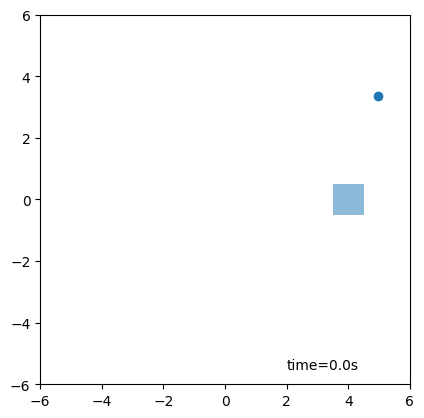

In [22]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection
from matplotlib.patches import Ellipse, Rectangle

fig, ax = plt.subplots()

ax.set_box_aspect(1)

ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

t_display = ax.text(2, -5.5, "t=0.0s")

rectangle = Rectangle((3.5, -0.5), 1, 1)

fixation_point = Ellipse((0, 0), 0.5, 0.5, color="black", alpha=0.3)

fp = ax.add_patch(fixation_point)

pc = PatchCollection([rectangle], alpha=0.5)

ax.add_collection(pc)

scat = ax.scatter(
    downsampled.loc[0, "x"],
    downsampled.loc[0, "y"],
)


def update(frame: int):
    time_fp_on = 0.758133
    time_fp_off = 2.041467
    scat.set_offsets((downsampled.loc[frame, "x"], downsampled.loc[frame, "y"]))
    t_display.set_text(f"time={frame/10}s")
    r = 0 if frame / 10 < time_fp_on or frame / 10 > time_fp_off else 0.5
    fp.set_width(r)
    fp.set_height(r)

    return (scat, t_display, fp)


ani = animation.FuncAnimation(fig=fig, func=update, frames=len(downsampled) - 1)

writer = animation.PillowWriter(fps=100)
ani.save(filename="data/animations/animation.gif", writer=writer)
ani.to_jshtml()